In [1]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Day 11: Least-Squares Line/Curve of Best Fit

In this notebook we move on from *interpolation* and into *curve fitting*. As a reminder, the difference between *interpolation* and *curve-fitting* is that we are trying to fit data "on-average" with *curve-fitting*, whereas *interpolants* are forced to pass through each of our observed data points. An example of linear regression models fit to data appears below.

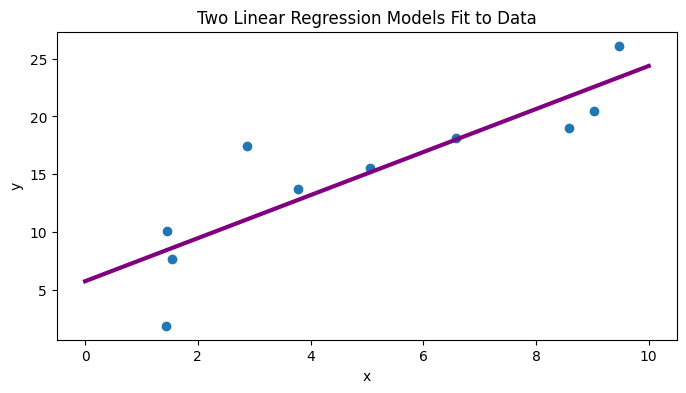

In [2]:
#@title
x = np.random.uniform(0, 10, 10)
y = 2*x + 4 + np.random.normal(0, 3, 10)

my_fit1 = np.polyfit(x, y, deg = 1)
my_fit1 = np.poly1d(my_fit1)
my_fit4 = np.polyfit(x, y, deg = 4)
my_fit4 = np.poly1d(my_fit4)


x_new = np.linspace(0, 10, 250)
y_fit1 = my_fit1(x_new)
y_fit4 = my_fit4(x_new)

plt.figure(figsize = (8, 4))
plt.scatter(x, y)
plt.plot(x_new, y_fit1, color = "purple", linewidth = 3)
#plt.plot(x_new, y_fit4, color = "green", linewidth = 3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Two Linear Regression Models Fit to Data")
plt.show()

## Overview

It is often the case where we are collecting *noisy* data (that is, data with inherent measurement errors). If this is the case, we certainly don't need (or want) to interpolate since we know that our observed data are approximate. Constructing a model which captures the *general trend* present in the collected observations is preferrable. That model, however, should have a relatively simple form since we do not want to capture or reproduce the *noise*.

Consider a function

$$f\left(x\right) = f\left(x\mid \beta_0, \beta_1,\cdots,\beta_m\right)$$

which has been fitted using $n+1$ observed data points of the form $\left(\vec{x}_i, y_i\right)$. This function includes $m+1$ parameters ($\beta_0, \cdots, \beta_m$), so $m+1 < n+1$. The observed points $\left(\vec{x}_i, y_i\right)$ consist of measurements on independent variables which are contained in $\vec{x}_i$ and a corresponding measured dependent response contained in $y_i$. Note that $\vec{x}_i$ may consist of a single measured variable or many. For example, if the data represent the *displacements* $y_i$ of an overdamped mass-spring system at time $t$, then the observations are of the form $\left(t_i, y_i\right)$ and the form of the model suggested by theory is $\displaystyle{f\left(t\right) = a_0te^{-a_1t}}$. The parameters $a_0$ and $a_1$ for the model are to be *learned* from the observed data (these take the place of the $\beta$s referenced above).

In general, parameters for a fitted model are obtained by minimizing a *loss function*. If we are willing to assume that the *noise* is a feature of the response variable only (and the measurements on the independent variable(s) are to be trusted), then the most common loss function is the *Sum of Squared Errors*:

$$L\left(\beta_0, \beta_1,\cdots,\beta_m\right) = \sum_{i=0}^{n}{\left[y_i - f\left(x_i\right)\right]^2}$$

Models fit by minimizing the loss function above are said to be fit using *Ordinary Least Squares* (OLS).

The values of the $\beta$-parameters minimizing any Loss Function will satisfy the simultaneous system:

$$\left\{\frac{\partial L}{\partial \beta_j} = 0,~~\text{for}~~ j = 0, 1,\cdots, m\right.$$

Depending on the form of the model $f\left(x\right)$ the equations in the system above may be non-linear and difficult to solve. It is common to choose $f\left(x\right)$ to be a *linear combination* of *base functions* $f_i\left(x\right)$ so that

$$f\left(x\right) = \beta_0f_0\left(x\right) + \beta_1f_1\left(x\right) + \cdots + \beta_mf_m\left(x\right)$$

which forces the simultaneous system to be linear in the $\beta_i$ values. As an example, if the fitted function is to be a polynomial, then we have $f_0\left(x\right) = 1$, $f_1\left(x\right) = x$, $f_2\left(x\right) = x^2$, and so on. This gives

$$f\left(x\right) = \beta_0 + \beta_1x + \beta_2x^2 + \cdots + \beta_mx^m$$

Since we know that the fitted model will not pass through all of the observed data points, we can define the standard error of the model residuals (prediction errors) as follows:

$$s_E = \sqrt{\frac{L}{n - m}}$$

Note that if $n+1 = m+1$ then the model is an interpolant and the $s_E$ is undefined since it takes a "zero over zero" form.

## Fitting a Straight-Line Model

A simple linear regression model is a model of the form $f\left(x\right) = \beta_0 + \beta_1x$ which is fit to observed data of the form $\left(x_i, y_i\right)$ by minimizing the sum of squared residuals. In this case we can analyze our Loss function as follows:

\begin{align*} L\left(\beta_0, \beta_1\right) &= \sum_{i = 0}^{n}{\left[y_i - f\left(x_i\right)\right]^2}\\
&= \sum_{i = 0}^{n}{\left[y_i - \beta_0 - \beta_1x_i\right]^2}
\end{align*}

We can minimize $L\left(\beta_0, \beta_1\right)$ by solving the following system:

$$\left\{\begin{array}{lcl} \frac{\partial L}{\partial \beta_0} & = & 0\\
\frac{\partial L}{\partial \beta_1} & = & 0\end{array}\right.$$
$$\implies \left\{\begin{array}{lcl} \sum{-2\left(y_i - \beta_0 - \beta_1x_i\right)} & = & 0\\
\sum{-2x_i\left(y_i - \beta_0 - \beta_1x_i\right)} & = & 0\end{array}\right.$$
$$\implies \left\{\begin{array}{lcl} \sum{\left(y_i - \beta_0 - \beta_1x_i\right)} & = & 0\\
\sum{\left(x_iy_i - \beta_0x_i - \beta_1x_i^2\right)} & = & 0\end{array}\right.$$
$$\implies \left\{\begin{array}{lcl} \sum{\left(\frac{y_i}{n+1} - \frac{\beta_0}{n+1} - \frac{\beta_1x_i}{n+1}\right)} & = & 0\\
\sum{\left(\frac{x_iy_i}{n+1} - \frac{\beta_0x_i}{n+1} - \frac{\beta_1x_i^2}{n+1}\right)} & = & 0\end{array}\right.$$
$$\implies \left\{\begin{array}{lcl} \bar{y} - \beta_0 - \beta_1\bar{x} & = & 0\\
- \beta_0\bar{x} + \sum{\left(\frac{x_iy_i}{n+1} - \frac{\beta_1x_i^2}{n+1}\right)} & = & 0\end{array}\right.$$

The top equation in the last line above indicates that $\beta_0 = \bar{y} - \beta_1\bar{x}$. We can substitute this into the bottom equation and use some algebra to arrive at $\displaystyle{\beta_1 = \frac{\sum{y_i\left(x_i - \bar{x}\right)}}{\sum{x_i\left(x_i - \bar{x}\right)}}}$. ($\bigstar$ -- the algebra required is included at the end of this notebook for those interested)


## Fitting Linear Forms

Consider the least-squares fit

\begin{align*}f\left(x\right) &= \beta_0f_0\left(x\right) + \beta_1f_1\left(x\right) + \beta_2f_2\left(x\right) + \cdots + \beta_mf_m\left(x\right)\\
&= \sum_{j=0}^{m}{\beta_j f_j\left(x\right)}
\end{align*}

Substituting this into our *least squares loss function* gives

$$L\left(\beta_0, \beta_1, \cdots, \beta_m\right) = \sum_{i=0}^{n}\left[y_i - \sum_{j=0}^{m}{\beta_j f_j\left(x_i\right)}\right]^2$$

Which is minimized by the solution to the following linear system:

$$\left\{\frac{\partial L}{\partial \beta_k} = -2\left(\sum_{i=0}^{n}{\left(\left(y_i - \sum_{j = 0}^{m}{\left(\beta_j f_j\left(x_i\right)\right)}\right)f_k\left(x_i\right)\right)}\right) = 0\right.~~\text{for}~~k = 0, 1, \cdots, m$$

We can divide both sides of each equation in the system by $-2$ and rearrange the summations to arrive at:

\begin{align*}\left\{\left(\sum_{i=0}^{n}{\left(\left(y_i - \sum_{j = 0}^{m}{\left(\beta_j f_j\left(x_i\right)\right)}\right)f_k\left(x_i\right)\right)}\right)\right. &= 0\\
\implies \left\{\sum_{i=0}^{n}{\left(y_if_k\left(x_i\right) - \sum_{j = 0}^{m}{\left(\beta_j f_j\left(x_i\right)f_k\left(x_i\right)\right)}\right)}\right. &= 0\\
\implies \left\{\sum_{i=0}^{n}{\left(y_if_k\left(x_i\right)\right)} - \sum_{i=0}^{n}{\left(\sum_{j = 0}^{m}{\left(\beta_j f_j\left(x_i\right)f_k\left(x_i\right)\right)}\right)}\right. &= 0\\
\implies \left\{\sum_{i=0}^{n}{\left(\sum_{j = 0}^{m}{\left(\beta_j f_j\left(x_i\right)f_k\left(x_i\right)\right)}\right)}\right. &= \sum_{i=0}^{n}{\left(y_if_k\left(x_i\right)\right)}\\
\implies \left\{\sum_{j=0}^{m}{\left(\sum_{i = 0}^{n}{\left(\beta_j f_j\left(x_i\right)f_k\left(x_i\right)\right)}\right)}\right. &= \sum_{i=0}^{n}{\left(y_if_k\left(x_i\right)\right)}\\
\implies \left\{\sum_{j=0}^{m}{\left(\sum_{i = 0}^{n}{\left(f_j\left(x_i\right)f_k\left(x_i\right)\right)\beta_j}\right)}\right. &= \sum_{i=0}^{n}{\left(f_k\left(x_i\right)y_i\right)}~~\text{for}~~k = 0, 1, \cdots, m\\
\end{align*}

We can rewrite the above using matrix notation as $A\vec{\beta} = \vec{b}$, where

$$A_{kj} = \sum_{i = 0}^{n}{f_j\left(x_i\right)f_k\left(x_i\right)}~~~~\text{and}~~~~b_k = \sum_{i=0}^{n}{f_k\left(x_i\right)y_i}$$

These equations are known as the *normal equations* of the least-squares fit, and can be solved using our numerical methods for solving [symmetric] linear systems!


## Polynomial Fit

As mentioned earlier, a commonly used linear form is a polynomial. In this case, the basis functions are $f_j\left(x\right) = x^j$. This leads to the following $A$ and $\vec{b}$ from the normal equations above:

$$A_{kj} = \sum_{i = 0}^{n}{x_i^{j+k}}~~~~\text{and}~~~~b_k = \sum_{i=0}^{n}{x_i^ky_i}$$

The coefficient matrix $A$ becomes increasingly ill-conditioned as $m$ is made larger. Luckily, high-degree polynomials are typically not used in curve-fitting since they are very susceptible to fitting the noise in the observed data.

## Least Squares Fitting Algorithms

With all of that math understood, we are ready to construct a routine to fit least-squares polynomial models. Since we need to solve symmetric linear systems as part of solving the normal equations, we'll need to copy/paste a function from earlier in our course into this notebook. Because observed data can come in any order, we should be worried about when to *pivot* as we solve our linear system. For this reason, we'll bring in the `swapRows()`, `scaleFactors()`, and `gaussPivot()` functions from our Day 7 notebook.

In [3]:
#######################################
##Gaussian Pivot Linear System Solver
#######################################
def swapRows(v, i, j):
  if len(v.shape) == 1:
    v[i], v[j] = v[j], v[i]
  else:
    v[[i, j], :] = v[[j, i], :]

def scaleFactors(A):
  n = A.shape[0]
  s = np.zeros(n)
  for i in range(n):
    s[i] = max(np.abs(A[i, :]))

  return s

def gaussPivot(A, b, tol = 1.0e-12):
  n = len(b)
  s = scaleFactors(A)

  for k in range(0, n-1):
    p = np.argmax(np.abs(A[k:n, k])/s[k:n]) + k
    if(abs(A[p, k]) < tol):
      print("Matrix is Singular")
      return None

    #Row Pivot if necessary
    if p != k:
      swapRows(b, k, p)
      swapRows(s, k, p)
      swapRows(A, k, p)

    #Elimination
    for i in range(k+1, n):
      if A[i, k] != 0.0:
        lam = A[i, k]/A[k, k]
        A[i, (k+1):n] = A[i, (k+1):n] - lam*A[k, (k+1):n]
        b[i] = b[i] - lam*b[k]

  if abs(A[n-1, n-1]) < tol:
    print("Matrix is Singular")
    return None

  #back substitution
  b[n-1] = b[n-1]/A[n-1, n-1]
  for k in range(n-2, -1, -1):
    b[k] = (b[k] - np.dot(A[k, (k+1):n], b[(k+1):n]))/A[k, k]

  return b

Now that those are read into our notebook, we'll write our `polyFit()` routine. This routine will return the coefficients of a linear model of the form

$$f\left(x\right) = \beta_0 + \beta_1 x + \beta_2 x^2 + \cdots + \beta_m x^m$$

fit on training data of the form $\left(x_i, y_i\right)$ with `xData` holding the $x_i$ values an `yData` holding the $y_i$ values. The function will take one additional parameter, `m`, which is the degree of the polynomial model.

In [4]:
def polyFit(xData, yData, m):
  A = np.zeros((m+1, m+1))
  b = np.zeros(m+1)
  s = np.zeros(2*m+1)

  for i in range(len(xData)):
    temp = yData[i]
    for j in range(m+1):
      b[j] = b[j] + temp
      temp = temp*xData[i]

    temp = 1.0

    for j in range(2*m + 1):
      s[j] = s[j] + temp
      temp = temp*xData[i]

  for i in range(m+1):
    for j in range(m+1):
      A[i, j] = s[i + j]

  return gaussPivot(A, b)

def evalPoly(coefs, x):
  m = len(coefs) - 1
  p = coefs[m]
  for j in range(m):
    p = p*x + coefs[m - j - 1]

  return p

def getStdError(xData, yData, coefs):
  n = len(xData)
  m = len(coefs)
  sse = 0.0
  for i in range(n):
    y_hat = evalPoly(coefs, xData[i])
    resid = yData[i] - y_hat
    sse = sse + resid**2

  stdError = (sse/(n - m))**0.5
  return stdError

def plotPoly(xData, yData, coefs, num_pts = 100, xlab = "x", ylab = "y"):
  m = len(coefs)
  x1 = min(xData)
  x2 = max(xData)
  x_new = np.linspace(x1, x2, num_pts)
  y_new = np.zeros(len(x_new))

  for i in range(num_pts):
    y_new[i] = evalPoly(coefs, x_new[i])

  plt.figure(figsize = (12, 4))
  plt.scatter(xData, yData, color = "black")
  plt.plot(x_new, y_new, color = "purple")
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title("A Polynomial Least Squares Fit of Degree " + str(m - 1))
  plt.show()

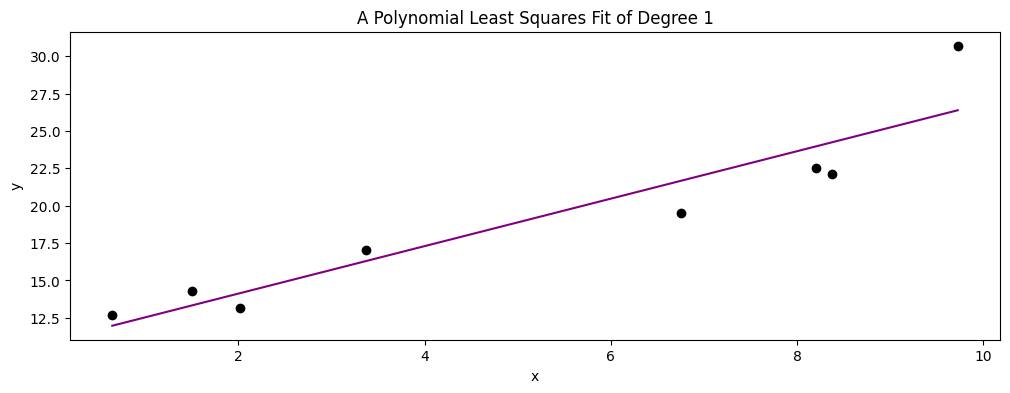

In [5]:
xData = np.random.uniform(0, 10, 8)
yData = 5 + 2*xData + np.random.uniform(0, 8, 8)

#plt.scatter(xData, yData)

coefs_deg3 = polyFit(xData, yData, m = 1)
plotPoly(xData, yData, coefs_deg3, num_pts = 5000)

***

## Summary

In this notebook we saw how to fit a curve to data using the method of *Ordinary Least Squares*. In particular, we worked with polynomial models, but we developed the general form of the *normal equations* for least squares which apply for any model which is a linear combination of *basis functions* $f_i\left(x\right)$. Finally, we wrote a routine that will fit a polynomial model of desired degree to observed data and included some helper functions to evaluate and plot the polynomial.

### Aside: Owed Algebra

Earlier in this notebook it was suggested that, after a bit of algebra, we could obtain $\displaystyle{\beta_1 = \frac{\sum{y_i\left(x_i - \bar{x}\right)}}{\sum{x_i\left(x_i - \bar{x}\right)}}}$. The algebra required for that appears below.

Recall that we have $\beta_0 = \bar{y} - \beta_1\bar{x}$. From here we have


\begin{align*} -\beta_0\bar{x} + \sum{\left(\frac{x_iy_i}{n+1} - \frac{\beta_1x_i^2}{n+1}\right)} &= 0\\
\implies -\left(\bar{y} - \beta_1 \bar{x}\right)\bar{x} + \sum{\left(\frac{x_iy_i}{n+1} - \frac{\beta_1x_i^2}{n+1}\right)} &= 0\\
\implies -\bar{x}\bar{y} + \beta_1\bar{x}^2 + \sum{\frac{x_iy_i}{n+1}} - \beta_1\sum{\frac{x_i^2}{n+1}} &= 0\\
\implies \beta_1\sum{\frac{x_i^2}{n+1}} - \beta_1\bar{x}^2  &= \sum{\frac{x_iy_i}{n+1}} - \bar{x}\bar{y} \\
\implies \beta_1\left(\sum{\frac{x_i^2}{n+1}} - \left(\sum{\frac{x_i}{n+1}}\right)^2\right) &= \sum{\frac{x_iy_i}{n+1}} - \left(\sum{\frac{x_i}{n+1}}\right)\left(\sum{\frac{y_i}{n+1}}\right)\\
\implies \beta_1\left(\sum{\frac{x_i^2}{n+1}} - \left(\sum{\frac{x_i}{n+1}}\right)\left(\sum{\frac{x_i}{n+1}}\right)\right) &= \sum{\frac{x_iy_i}{n+1}} - \left(\sum{\frac{x_i}{n+1}}\right)\left(\sum{\frac{y_i}{n+1}}\right)\\
\implies \beta_1\left(\sum{\left(\frac{x_i}{n+1}\left(x_i - \sum{\frac{x_i}{n+1}}\right)\right)}\right) &= \sum{\left(\frac{y_i}{n+1}\left(x_i - \sum{\frac{x_i}{n+1}}\right)\right)}\\
\implies \beta_1\sum{\left(\frac{x_i}{n+1}\left(x_i - \bar{x}\right)\right)} &= \sum{\left(\frac{y_i}{n+1}\left(x_i - \bar{x}\right)\right)}\\
\implies \beta_1\sum{x_i\left(x_i - \bar{x}\right)} &= \sum{y_i\left(x_i - \bar{x}\right)}\\
\implies \beta_1 &= \frac{\sum{y_i\left(x_i - \bar{x}\right)}}{\sum{x_i\left(x_i - \bar{x}\right)}}~~\checkmark
\end{align*}